# Titanic Prediction using Decison Trees+Random Forests

# Loading Training Data

First we'll load some fake data on past hires I made up. Note how we use pandas to convert a csv file into a DataFrame:

In [5]:
pwd

UsageError: CWD no longer exists - please use %cd to change directory.


In [4]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame

#input_file = "e:/sundog-consult/udemy/datascience/PastHires.csv"
train_file = "../packages/regression_model/regression_model/datasets/train.csv"
test_file = "../packages/regression_model/regression_model/datasets/test.csv"


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-a76f6372d940>", line 2, in <module>
    import pandas as pd
  File "/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/pandas/__init__.py", line 42, in <module>
    from pandas.core.api import *
  File "/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/pandas/core/api.py", line 10, in <module>
    from pandas.core.groupby.groupby import Grouper
  File "/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/__init__.py", line 2, in <module>
    from pandas.core.groupby.groupby import (
  File "/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py", line 49, in <module>
    from pandas.core.frame import DataFrame
  File "/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/pandas/cor

FileNotFoundError: [Errno 2] No such file or directory

In [2]:
pwd

UsageError: CWD no longer exists - please use %cd to change directory.


# Data Analysis

Check which columns are numeric in data

Data types:

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df['Cabin'].str.slice(0, 1).unique()
#.nunique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [67]:
df[df['Fare']==0]
#var = df['Age'].mode()[0]
#df['Age'].fillna(var)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,0.0
263,264,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.0,B94,0.0
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,NaN,0,0,239853,0.0,NaN,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,0.0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",1,NaN,0,0,239853,0.0,NaN,0.0
466,467,0,2,"Campbell, Mr. William",1,NaN,0,0,239853,0.0,NaN,0.0
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",1,NaN,0,0,239854,0.0,NaN,0.0
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,0.0
633,634,0,1,"Parr, Mr. William Henry Marsh",1,NaN,0,0,112052,0.0,NaN,0.0


Finding missing values:

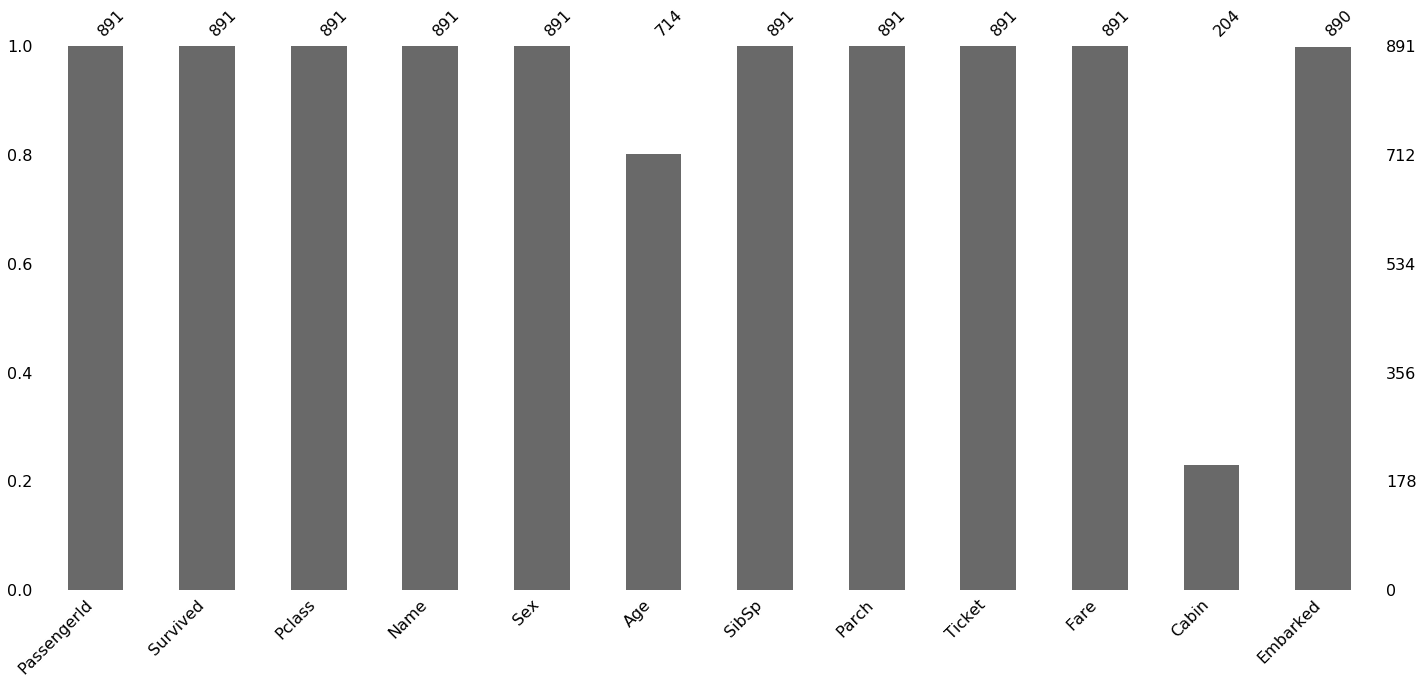

In [13]:
import missingno as ms
ms.bar(df)

So we have missing data in Age & Cabin columns.
We will now numericalize Sex, Ticket and Emabrked columns to predict ""Age and Cabin"" useing Decision Trees.
First we will see how many **unique** values Sex, Ticket and Emabrked have.

In [14]:
df.apply(pd.Series.nunique)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Looking out for non-numeric columns

In [16]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
nonnumeric_cols=df.select_dtypes(exclude=numerics).columns.values
print ("Non numeric columns to look out for: " + str(nonnumeric_cols))

Non numeric columns to look out for: ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']


# Fixing missing values..

In [22]:
d = {'male': 1, 'female': 0}
df['Sex'] = df['Sex'].map(d)
d = {'S': 0, 'Q': 1 ,'C':2}
df['Embarked']=df['Embarked'].map(d)
#df.head()

Finding missing values using Imputer from sklearn for Age and Cabin

In [24]:
import numpy as np
from sklearn.preprocessing import Imputer

missFix=df[['Survived','Pclass','SibSp','Parch','Sex','Age']]

fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(missFix))
imputed_DF.columns = missFix.columns
imputed_DF.index = missFix.index

print(imputed_DF.count())


Survived    891
Pclass      891
SibSp       891
Parch       891
Sex         891
Age         891
dtype: int64


/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/awaiskaleem/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

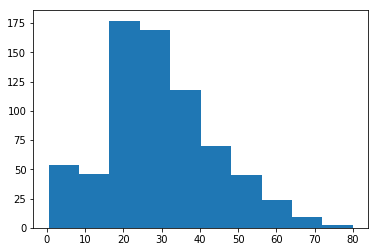

In [25]:
plt.hist(df['Age'])

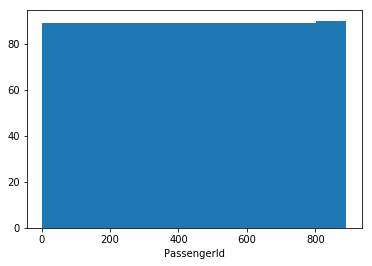

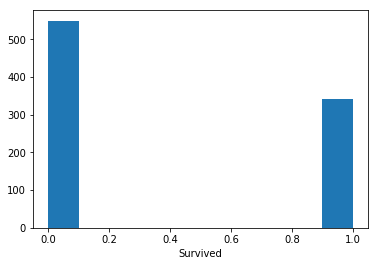

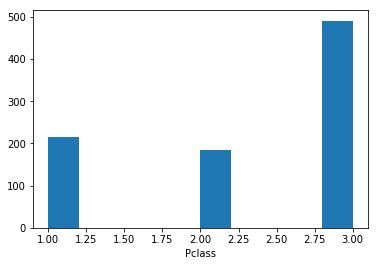

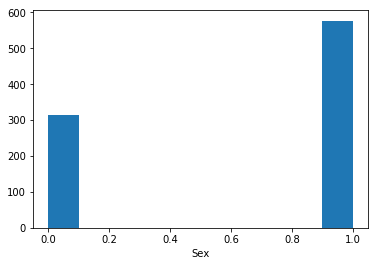

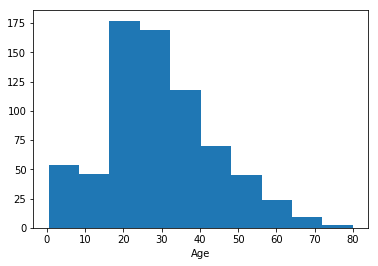

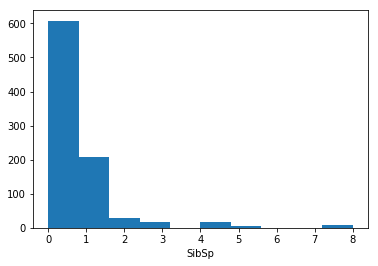

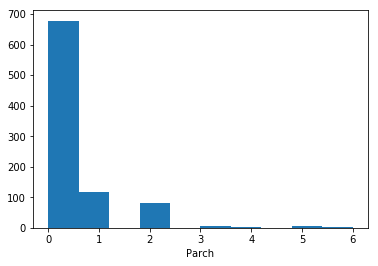

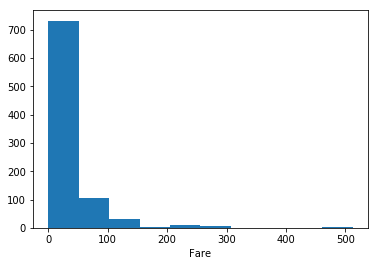

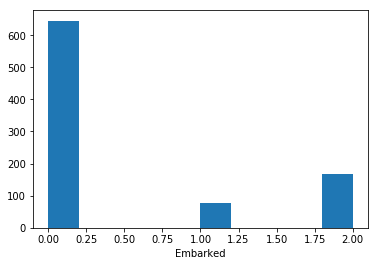

Name
Ticket
Cabin


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
#Find non - uniform distributions
for col in df.select_dtypes(include=numerics):
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()
for col in df.select_dtypes(exclude=numerics):    
    print(col)


*Cabin* is not a good candidiate for missing values Imputer since 
1- It is non numeric (categorical)
2- Number of most frequent values are very less as shown by code below:

#most_common = pd.get_dummies(df['Cabin']).sum().sort_values(ascending=False)#.index[0]
#most_common


# Train/Test split

In [19]:
np.random.seed()
msk = np.random.rand(len(imputed_DF)) < 0.8
dfTrain = imputed_DF[msk]
dfTest = imputed_DF[~msk]

print len(dfTrain)
print len(dfTest)

713
178


# Decision Tree creation

Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [20]:
features = list(dfTrain.columns[1:])
features

['Pclass', 'SibSp', 'Parch', 'Sex', 'Age']

Now actually construct the decision tree:

In [21]:
y = dfTrain["Survived"]
X = dfTrain[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

#dtTrainResults=DataFrame(clf.predict(dfTrain[features]),columns=list([['Survived']]))
dtTestResults=DataFrame(clf.predict(dfTest[features]),columns=list([['Survived']]))


#accuracy_score(dfTrain['Survived'], dtTrainResults['Survived'], sample_weight=None)
accuracy_score(dfTest['Survived'], dtTestResults['Survived'], sample_weight=None)


0.7752808988764045

## Using Random forests

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [30]:
from sklearn.feature_selection import RFE

clf = RandomForestClassifier(n_estimators=100) #means make 1000 random forests
clf = clf.fit(X, y)

#dfTest.head()

#dtTrainResults_RF=DataFrame(clf.predict(dfTrain[features]),columns=list([['Survived']]))
dtTestResults_RF=DataFrame(clf.predict(dfTest[features]),columns=list([['Survived']]))

#accuracy_score(dfTrain['Survived'], dtTrainResults_RF['Survived'], sample_weight=None)
accuracy_score(dfTest['Survived'], dtTestResults_RF['Survived'], sample_weight=None)

#RFE#
#rfe = RFE(clf, 3)
#rfe.fit(X, y)
#dtTestResults_RF=DataFrame(clf.predict(dfTest[features]),columns=list([['Survived']]))
#print accuracy_score(dfTest['Survived'], dtTestResults_RF['Survived'], sample_weight=None)

0.7865168539325843

# Results/Testing

Now let's perform prediction on original Test dataset

In [29]:
#Now performing this on real test set
##################
# 1 #Loading file
##################
test_file = "E:/2- GoogleDrive (Total 15GB)/Interests/Machine Learning/Udemy - Data Science and Machine Learning with Python/DataScience/TitanicTest.csv"
dfTestFinal = pd.read_csv(test_file,header=0)

##################
# 2 #Rectifying missing values
##################
d = {'male': 1, 'female': 0}
dfTestFinal['Sex'] = dfTestFinal['Sex'].map(d)
d = {'S': 0, 'Q': 1 ,'C':2}
dfTestFinal['Embarked']=dfTestFinal['Embarked'].map(d)
missFix_Test=dfTestFinal[features]
fill_NaN_Test = Imputer(missing_values=np.nan, strategy='median', axis=1)
imputed_DF_Test = pd.DataFrame(fill_NaN_Test.fit_transform(missFix_Test))
imputed_DF_Test.columns = missFix_Test.columns
imputed_DF_Test.index = missFix_Test.index

##################
# 3 #Performing Prediction
##################
clf.predict(imputed_DF_Test[features])
dtTestResults_RF_Final=DataFrame(clf.predict(imputed_DF_Test[features]),columns=list([['Survived']]))

#RFE#
#rfe.predict(imputed_DF_Test[features])
#dtTestResults_RF_Final=DataFrame(rfe.predict(imputed_DF_Test[features]),columns=list([['Survived']]))

##################
# 4 #Exporting Results
##################
Results_Main = dfTestFinal.join(dtTestResults_RF_Final['Survived'])
results_file = "E:/2- GoogleDrive (Total 15GB)/Interests/Machine Learning/Udemy - Data Science and Machine Learning with Python/DataScience/TitanicResults.csv"
Results_Main.to_csv(results_file)


## Visualization

Display it. Note you need to have pyplot2 installed for this to work.

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the tim we get to that point. value = [3. 0.] means 3 no-hires and 0 hires.

In [417]:
#Added to fix "GraphViz's executables not found" issue
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

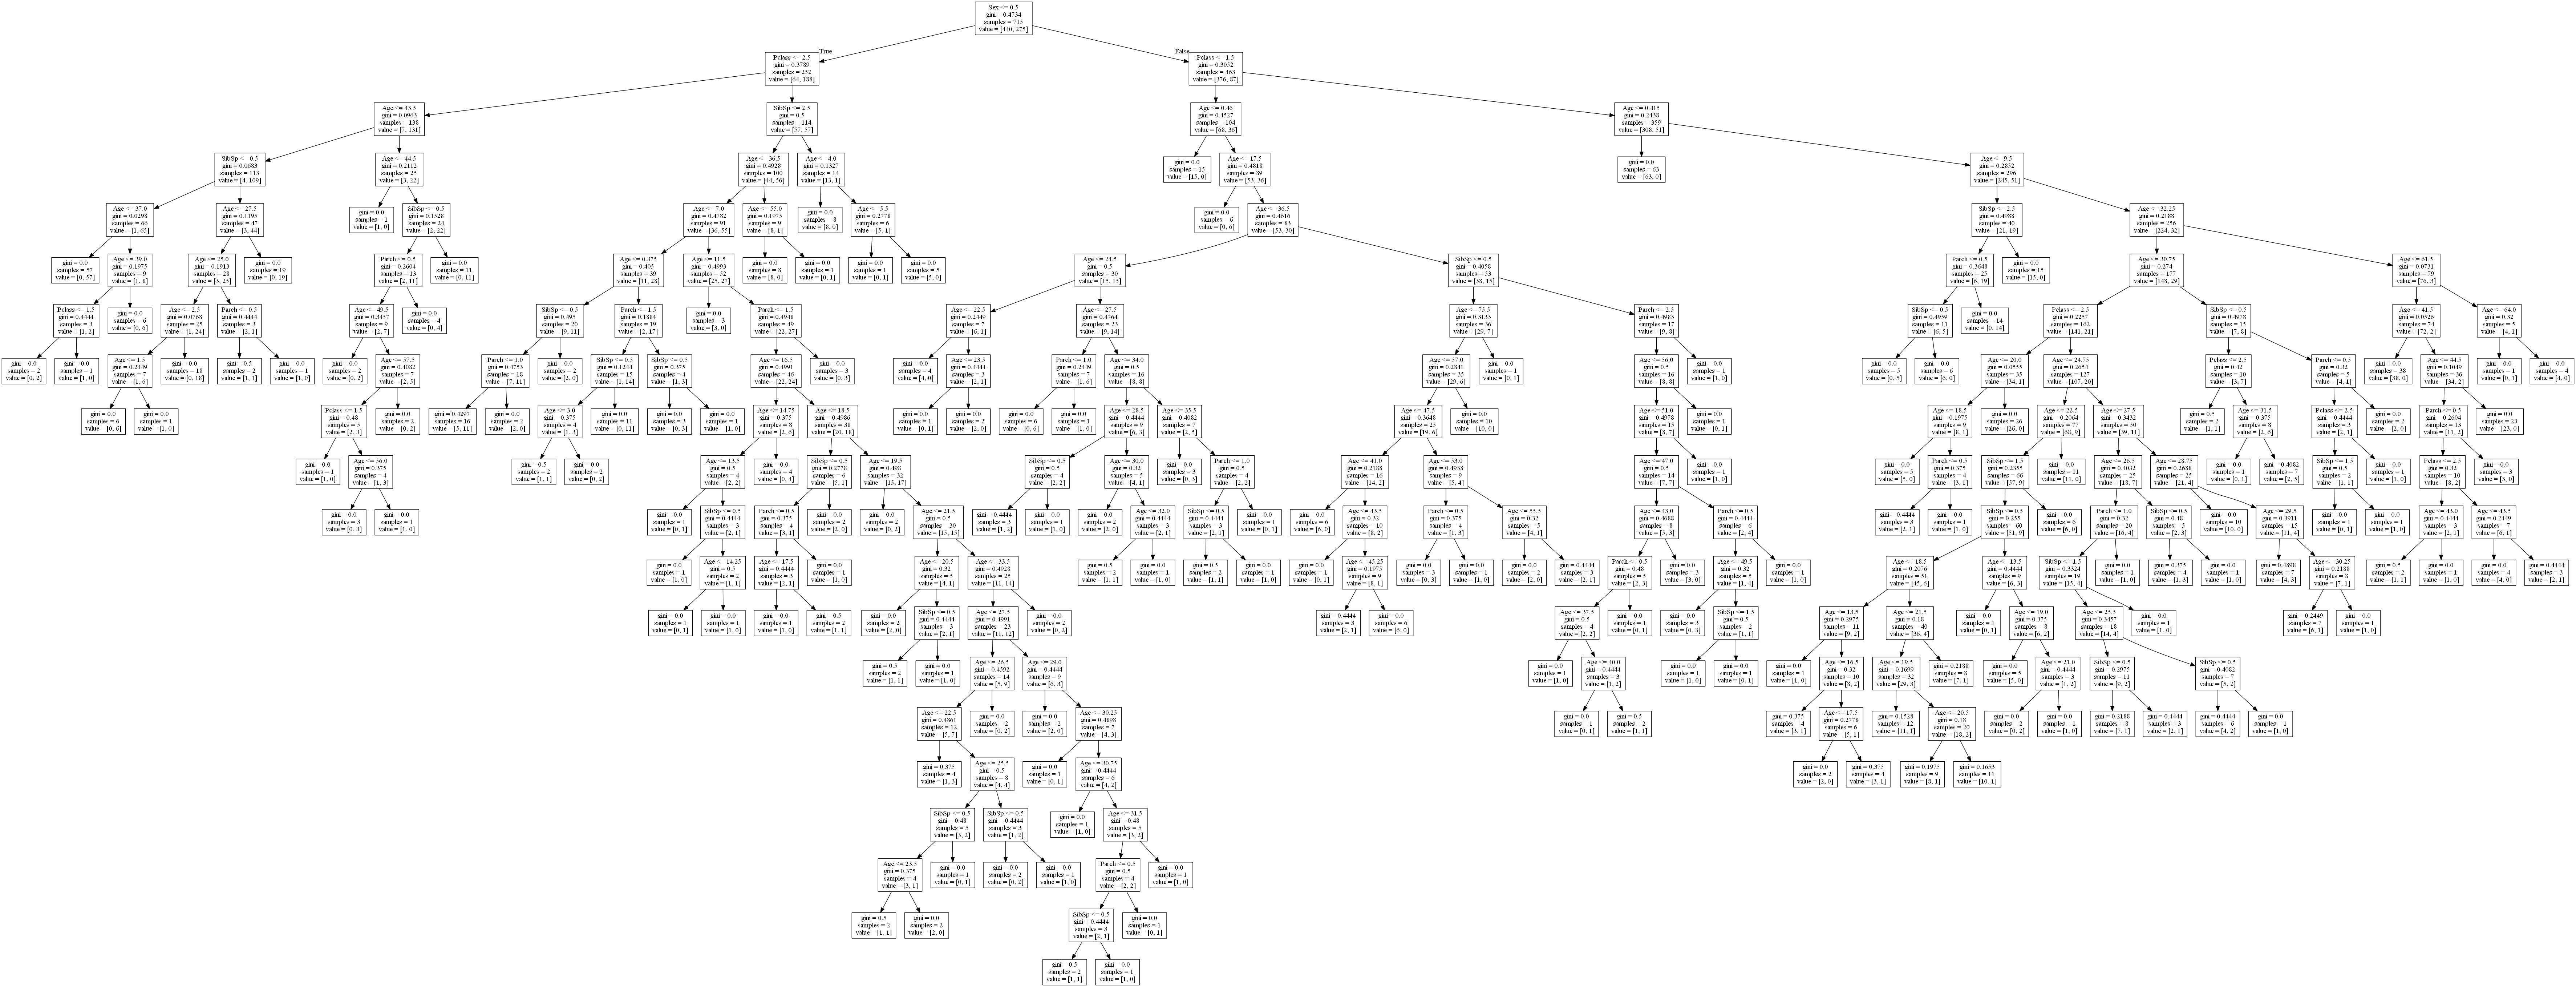

In [418]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot 

dot_data = StringIO()  #To save tree in it in next step

tree.export_graphviz(
                    clf, #the fitted tree itself
                    out_file=dot_data,  #Save the output tree in this variable in dotted format
                    feature_names=features #Input features to the tree for them to be displayed in tree
                    )  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  #convert dotted format to visual graph
Image(graph.create_png())  #Convert 'graph' image above to png

# ROUGH WORK!

**Following was just testing to use OLS for finding missing values**

In [289]:
#Age_NMiss = df[df.Age.notnull()] #This is data where we have Age
#Age_Miss = df[df.Age.isnull()] #This is data where we DO NOT have Age

#Age_NMiss_Train = Age_NMiss[80:]
#Age_NMiss_Test = Age_NMiss[:80]

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import itertools

scale = StandardScaler()

#Columns list to consider for X
potentialFeatures=np.array(['Survived','Pclass','SibSp','Parch','Sex']).tolist()

#Making Y
#y=Age_NMiss_Train['Age']
y=scale.fit_transform(Age_NMiss_Train['Age'].as_matrix())


#Setting temporary values
max_X = 0.0

for iteration in range(1,len(potentialFeatures)+1):
    for stuff in itertools.combinations(potentialFeatures, iteration):
        Age_features=np.array(stuff).tolist()
        #Making X
        X = Age_NMiss_Train[Age_features]
        X[Age_features] = scale.fit_transform(X[Age_features].as_matrix())
        #Making OLS Model
        est = sm.OLS(y, X).fit()
        #Get max
        if max_X < est.rsquared:
            max_X=est.rsquared
            best_Features=stuff
            print str(max_X) + " " + str(Age_features)

print "and the final is"
bestFeatureFinal=np.array(best_Features).tolist()
X = Age_NMiss_Train[bestFeatureFinal]
X[bestFeatureFinal] = scale.fit_transform(X[bestFeatureFinal].as_matrix())
est2 = sm.OLS(y, X).fit()
print str(est2.rsquared) + str(bestFeatureFinal)

#print est2.predict(scale.fit_transform(Age_NMiss_Test[bestFeatureFinal].as_matrix()),Age_NMiss_Test['Age'])
#y=scale.inverse_transform(est2.predict(Age_NMiss_Test[bestFeatureFinal]))
#print y


C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

0.0066135016075 ['Survived']
0.127541486462 ['Pclass']
0.183104766203 ['Survived', 'Pclass']
0.202298667301 ['Pclass', 'SibSp']
0.25493576747 ['Survived', 'Pclass', 'SibSp']
0.257893052876 ['Survived', 'Pclass', 'SibSp', 'Parch']
0.25789313005 ['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex']
and the final is
0.25789313005['Survived', 'Pclass', 'SibSp', 'Parch', 'Sex']


C:\Users\MK255019\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
